# Source Code
## Nipun Pruthi && Srikanth Avasarala

In [6]:
# importing the necessary library
import imageio
import numpy as np

# Importing the image
img_p = '../images/mil.jpg'
img = imageio.imread(str(img_p))

In [7]:
# Print the image dimensions
print('Original image shape: {}'.format(img.shape))

# Coerce the image into grayscale format (if not already)
from skimage.color import rgb2gray
img_gray = rgb2gray(img)
print('New image shape: {}'.format(img_gray.shape))

Original image shape: (520, 696)
New image shape: (520, 696)


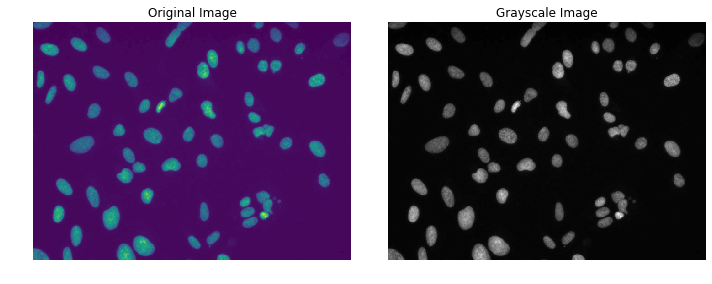

In [8]:
# Now, let's plot the data

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.tight_layout()
# plt.savefig('original n greyscale.png')
plt.show()

In [13]:
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(img_gray)
mask = np.where(img_gray > thresh_val, 1, 0)

# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)

In [50]:
thresh_val

21

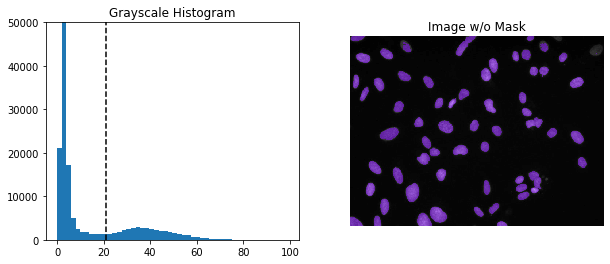

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
im_pixels = img_gray.flatten()
plt.hist(im_pixels,bins=50)
plt.vlines(thresh_val, 0, 100000, linestyle='--')
plt.ylim([0,50000])
plt.title('Grayscale Histogram')

plt.subplot(1,2,2)
mask_for_display = np.where(mask, mask, np.nan)
plt.imshow(img_gray, cmap='gray')
plt.imshow(mask_for_display, cmap='rainbow', alpha=0.5)
plt.axis('off')
plt.savefig('Image Histogram and Image Mask')
plt.title('Image w/o Mask')

plt.show()

In [38]:
from scipy import ndimage
labels, nlabels = ndimage.label(mask)
# nlabels

60

In [49]:
print(labels.shape, nlabels)
np.set_printoptions(threshold=6)
# print(labels)

(520, 696) 60


In [42]:
label_arrays = []
for label_num in range(1, nlabels+1):
    label_mask = np.where(labels == label_num, 1, 0)
    label_arrays.append(label_mask)

print('There are {} separate components / objects detected.'.format(nlabels))

There are 60 separate components / objects detected.


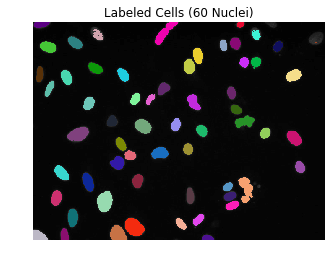

In [43]:
# Create a random colormap
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))

labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(img_gray, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.savefig('Labeled cells')
plt.title('Labeled Cells ({} Nuclei)'.format(nlabels))
plt.show()

In [44]:
for label_ind, label_coords in enumerate(ndimage.find_objects(labels)):
    cell = img_gray[label_coords]
    
    # Check if the label size is too small
    if np.product(cell.shape) < 10: 
        print('Label {} is too small! Setting to 0.'.format(label_ind))
        mask = np.where(labels==label_ind+1, 0, mask)

In [45]:
# Regenerate the labels
labels, nlabels = ndimage.label(mask)
print('There are now {} separate components / objects detected.'.format(nlabels))

There are now 60 separate components / objects detected.


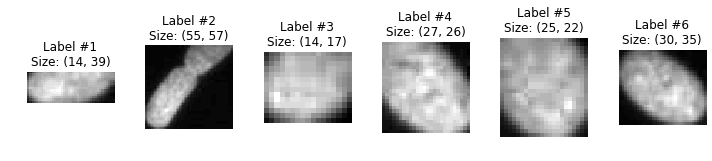

In [46]:
fig, axes = plt.subplots(1,6, figsize=(10,6))

for ii, obj_indices in enumerate(ndimage.find_objects(labels)[0:6]):
    cell = img_gray[obj_indices]
    axes[ii].imshow(cell, cmap='gray')
    axes[ii].axis('off')
    axes[ii].set_title('Label #{}\nSize: {}'.format(ii+1, cell.shape))

plt.tight_layout()
plt.savefig('label')
plt.show()

In [47]:
# Get the object indices, and perform a binary opening procedure
two_cell_indices = ndimage.find_objects(labels)[1]
cell_mask = mask[two_cell_indices]
cell_mask_opened = ndimage.binary_opening(cell_mask, iterations=8)

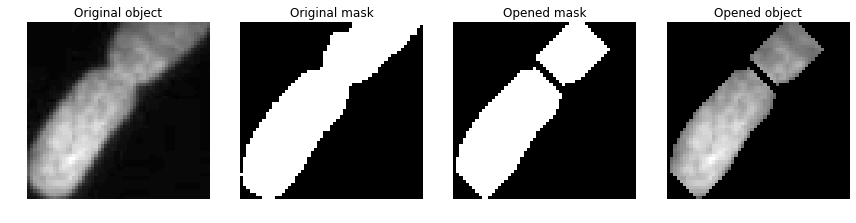

In [48]:
fig, axes = plt.subplots(1,4, figsize=(12,4))

axes[0].imshow(img_gray[two_cell_indices], cmap='gray')
axes[0].set_title('Original object')
axes[1].imshow(mask[two_cell_indices], cmap='gray')
axes[1].set_title('Original mask')
axes[2].imshow(cell_mask_opened, cmap='gray')
axes[2].set_title('Opened mask')
axes[3].imshow(img_gray[two_cell_indices]*cell_mask_opened, cmap='gray')
axes[3].set_title('Opened object')


for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.savefig('mask')
plt.show()